## Exploratory analysis of wildfire data
The following notebook will explore trends across the three wildfire seasons, and compare it with the air quality data

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.dates import date2num

In [2]:
# read in cleaned weather and air quality files
AQ_data = pd.read_csv('FarmingtonCommunityHall_AQ.csv')
wf_data = pd.read_csv('wildfire_data.csv')

In [3]:
# Reset index to datetime
AQ_data = AQ_data.set_index(pd.DatetimeIndex(AQ_data['Datetime']))
wf_data = wf_data.set_index(pd.DatetimeIndex(wf_data['Datetime']))

# Calculate the mean of all pollutants over a 24 period
AQ_daily = AQ_data.resample('D').mean()

AQ_daily.head()

,NOx,SO2,NO,NO2,TRS,O3
Datetime,,,,,,
2019-01-01,0.820833,0.333333,0.268750,0.543750,0.183333,37.122917
2019-01-02,0.739583,0.283333,0.229167,0.510417,0.104167,37.287500
2019-01-03,6.056250,0.297917,0.677083,5.362500,0.110417,28.483333
2019-01-04,6.258333,0.687500,0.377083,5.879167,0.172917,24.160417
2019-01-05,5.381250,1.010417,0.737500,4.652083,0.139583,26.127083


In [4]:
wf_data.head()

,Datetime,Fire Name,Fire Centre Name,Hectares Burned,Cause
Datetime,,,,,
2019-05-20,2019-05-20,Fontas River,Prince George,650.0,Natural
2019-05-11,2019-05-11,Lejac,Prince George,236.0,Human
2019-05-11,2019-05-11,Coffee Creek Subdivision,Prince George,9.0,human
2019-05-13,2019-05-13,Richter Creek,Kamloops,507.0,unknown
2019-05-27,2019-05-27,Black Angus Creek,Northwest,1935.0,Natural


In [5]:
# combine cleaned file into one dataframe
AQ_wf_daily = wf_data.merge(right=AQ_daily, how = 'right', left_index=True,
                            right_index=True)
# Reset DateTimeIndex
AQ_wf_daily = AQ_wf_daily.set_index(pd.DatetimeIndex(AQ_wf_daily['Datetime']))

# view combined df
AQ_wf_daily.head()

,Datetime,Fire Name,Fire Centre Name,Hectares Burned,Cause,NOx,SO2,NO,NO2,TRS,O3
Datetime,,,,,,,,,,,
NaT,NaN,NaN,NaN,NaN,NaN,0.820833,0.333333,0.268750,0.543750,0.183333,37.122917
NaT,NaN,NaN,NaN,NaN,NaN,0.739583,0.283333,0.229167,0.510417,0.104167,37.287500
NaT,NaN,NaN,NaN,NaN,NaN,6.056250,0.297917,0.677083,5.362500,0.110417,28.483333
NaT,NaN,NaN,NaN,NaN,NaN,6.258333,0.687500,0.377083,5.879167,0.172917,24.160417
NaT,NaN,NaN,NaN,NaN,NaN,5.381250,1.010417,0.737500,4.652083,0.139583,26.127083


In [6]:
wf_data['year'] = wf_data.index.year
wf_data['month'] = wf_data.index.month

wf_data.head()

,Datetime,Fire Name,Fire Centre Name,Hectares Burned,Cause,year,month
Datetime,,,,,,,
2019-05-20,2019-05-20,Fontas River,Prince George,650.0,Natural,2019,5
2019-05-11,2019-05-11,Lejac,Prince George,236.0,Human,2019,5
2019-05-11,2019-05-11,Coffee Creek Subdivision,Prince George,9.0,human,2019,5
2019-05-13,2019-05-13,Richter Creek,Kamloops,507.0,unknown,2019,5
2019-05-27,2019-05-27,Black Angus Creek,Northwest,1935.0,Natural,2019,5


Now that our dataset is prepared, we'll look at the size of wildfires in each fire centre over the three year period.

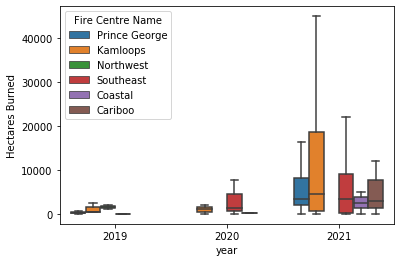

In [7]:
# Draw a nested boxplot to show wildfires of note by year and fire centre
sns.boxplot(x="year", y="Hectares Burned",
            hue="Fire Centre Name",
            data=wf_data,
            showfliers = False)

We can see that in 2021, a much larger area of land burned. The largest area burned was in Kamloops. The fire centre in which our AQ is measured (Prince George) also had large wildfires.

Next, let's look only at wildfires in Prince George Fire Centre.

In [ ]:
prince_george = wf_data[wf_data['Fire Centre Name'] == 'Prince George'].sort_values(by='Hectares Burned', ascending=False)
prince_george.head()

In [8]:
prince_george = wf_data[wf_data['Fire Centre Name'] == 'Prince George'].sort_values(by='Hectares Burned', ascending=False)
prince_george.head()

,Datetime,Fire Name,Fire Centre Name,Hectares Burned,Cause,year,month
Datetime,,,,,,,
2021-07-02,2021-07-02,Cutoff Creek,Prince George,33418.0,Natural,2021,7
2021-07-02,2021-07-02,Black Pine,Prince George,16314.0,Natural,2021,7
2021-07-01,2021-07-01,Mount Porter,Prince George,13659.0,Natural,2021,7
2021-06-30,2021-06-30,Klawli Lake,Prince George,8412.0,Natural,2021,6
2021-07-04,2021-07-04,Forres Mountain,Prince George,7770.0,Natural,2021,7


The five largest wildfires started within a five-day period, between June 30 and July 4 2021. We don't have data on how long these wildfires burned, but we will assume that if we were to see any impacts on air quality, it would occur around this time period.

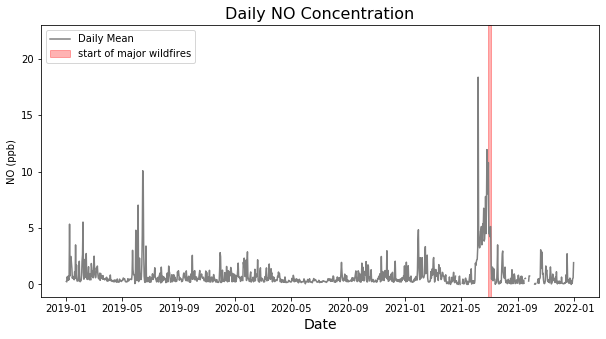

In [14]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(AQ_daily.index, AQ_daily['NO'], 'gray', label = 'Daily Mean')

ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('NO (ppb)')

ax.axvspan(date2num(datetime(2021,6,30,0)), date2num(datetime(2021,7,4,23)),
           label="Start of major wildfires in Prince George",color="red", alpha=0.3)

ax.legend()

ax.set_title('Daily NO Concentration', fontsize=16)
plt.show()

It looks like there are possible wildfire impacts on NO, but not the other pollutants.

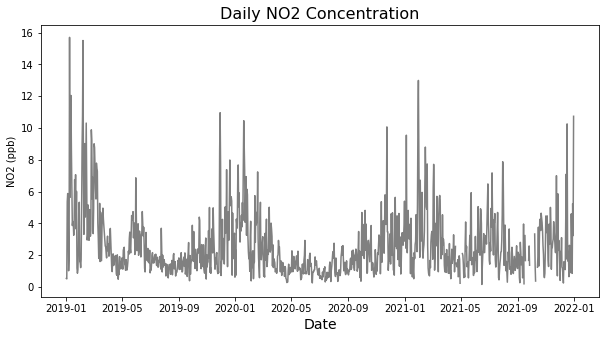

In [41]:
plt.figure(figsize=(10,5))

plt.plot(AQ_daily.index, AQ_daily['NO2'], 'gray', label = 'Daily Mean')

plt.xlabel('Date', fontsize=14)
plt.ylabel('NO2 (ppb)')


plt.title('Daily NO2 Concentration', fontsize=16)
plt.show()

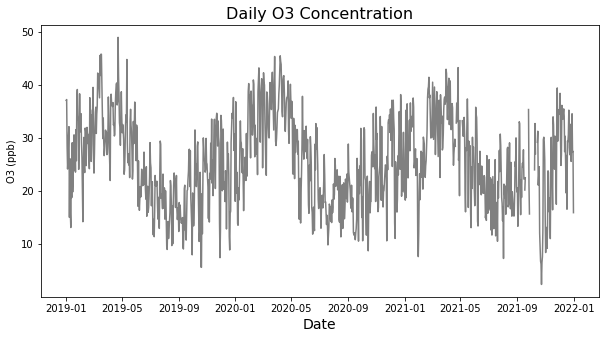

In [43]:
plt.figure(figsize=(10,5))

plt.plot(AQ_daily.index, AQ_daily['O3'], 'gray', label = 'Daily Mean')

plt.xlabel('Date', fontsize=14)
plt.ylabel('O3 (ppb)')


plt.title('Daily O3 Concentration', fontsize=16)
plt.show()

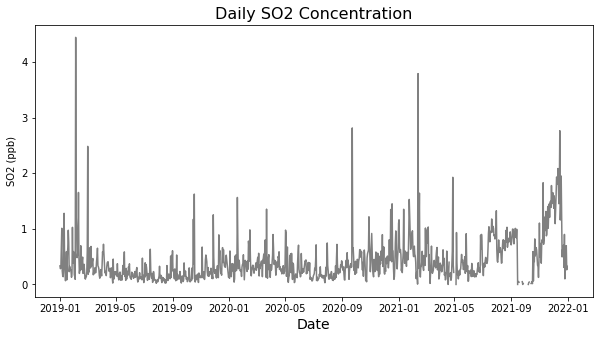

In [44]:
plt.figure(figsize=(10,5))

plt.plot(AQ_daily.index, AQ_daily['SO2'], 'gray', label = 'Daily Mean')

plt.xlabel('Date', fontsize=14)
plt.ylabel('SO2 (ppb)')


plt.title('Daily SO2 Concentration', fontsize=16)
plt.show()

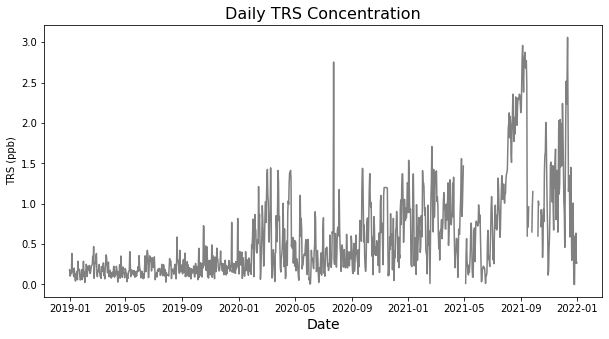

In [45]:
plt.figure(figsize=(10,5))

plt.plot(AQ_daily.index, AQ_daily['TRS'], 'gray', label = 'Daily Mean')

plt.xlabel('Date', fontsize=14)
plt.ylabel('TRS (ppb)')


plt.title('Daily TRS Concentration', fontsize=16)
plt.show()